Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
The first task is to compute the following integral with uniform and importance sampling in $[0,1]$ and compare the results.
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

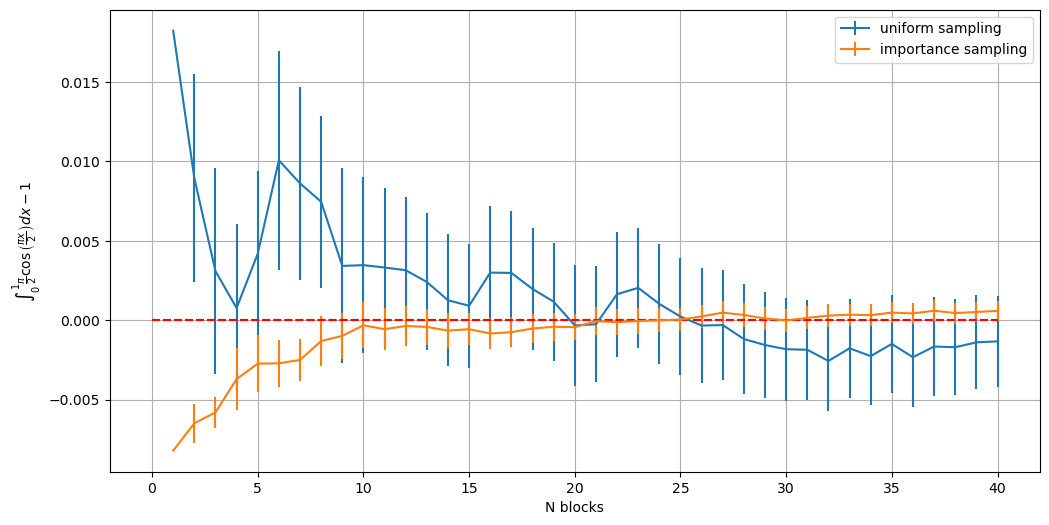

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def print_integral(plt, file_path, y_expected, label):
	avg, sigma = np.loadtxt(file_path, unpack=True)
	lenght = len(avg)
	x_graph = np.linspace(1,lenght,lenght)
	plt.errorbar(x_graph, avg - y_expected, yerr = sigma, label=label)
	plt.hlines(0, 0, lenght, colors='r', linestyles='dashed')
	plt.grid(True)
	plt.xlabel('N blocks')
	plt.ylabel(r'$\int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi x}{2}\right) dx - 1$')
plt.figure(figsize=(12,6))    
print_integral(plt, "../es_2/OUTPUT/uniform.txt", 1, "uniform sampling")
print_integral(plt, "../es_2/OUTPUT/importance.txt", 1, "importance sampling")
plt.legend()
plt.show()

As the plot shows importance sampling converges faster and with smaller statisitcal uncertainty. For importance sampling I used $d(x) = 2x-1$, computing the inverse cumulative distribution function with the bisection method.

### Exercise 02.2
- 3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a=1$ along a random direction obtained by sampling uniformly the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

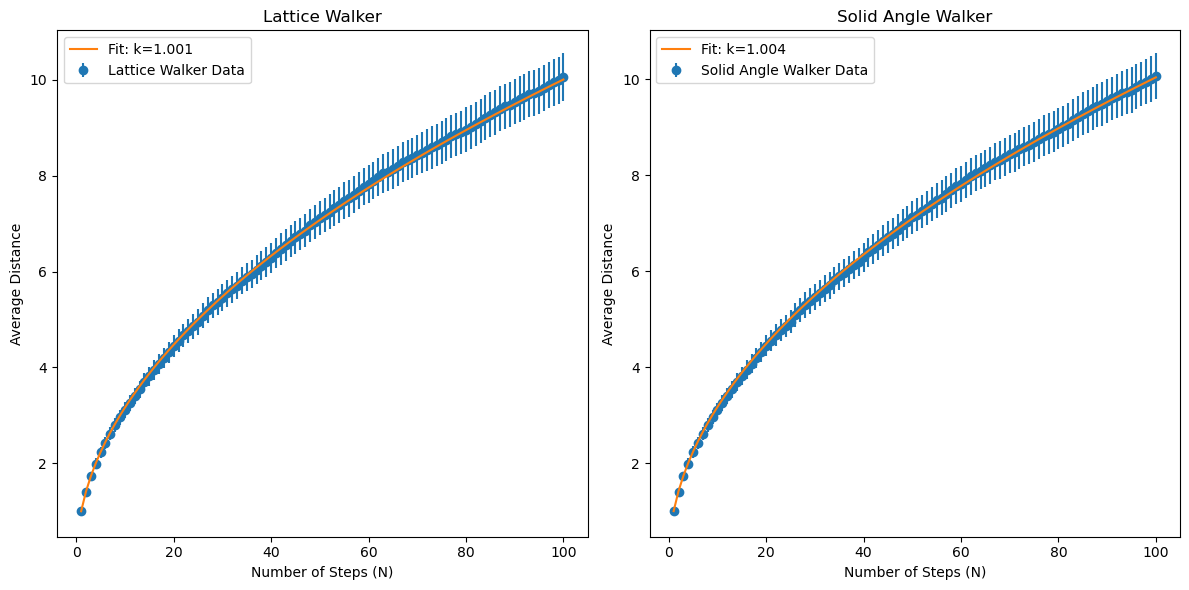

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from files
n_steps = 100
walk_blocks = 100
steps, average_lattice, latt_err= np.loadtxt("../es_2/OUTPUT/latticeRW.txt", unpack = True)
steps, average_solid, cont_err = np.loadtxt("../es_2/OUTPUT/contRW.txt", unpack = True) 


# Define the fitting function
def fit_function(N, k):
    return k * np.sqrt(N)

# Perform the fit
params_lattice, _ = curve_fit(fit_function, steps, average_lattice)
params_solid, _ = curve_fit(fit_function, steps, average_solid)

# Extract the fitting parameter k
k_lattice = params_lattice[0]
k_solid = params_solid[0]

# Plot the results
plt.figure(figsize=(12, 6))

# Plot for lattice walker
plt.subplot(1, 2, 1)
plt.errorbar(steps, average_solid, yerr=latt_err, fmt='o', label='Lattice Walker Data', zorder=1)
plt.plot(steps, fit_function(steps, k_lattice), '-', label=f'Fit: k={k_lattice:.3f}', zorder=2)
plt.xlabel('Number of Steps (N)')
plt.ylabel('Average Distance')
plt.title('Lattice Walker')
plt.legend()

# Plot for solid angle walker
plt.subplot(1, 2, 2)
plt.errorbar(steps, average_solid, yerr=cont_err, fmt='o', label='Solid Angle Walker Data', zorder=1)
plt.plot(steps, fit_function(steps, k_solid), '-', label=f'Fit: k={k_solid:.3f}', zorder=2)
plt.xlabel('Number of Steps (N)')
plt.ylabel('Average Distance')
plt.title('Solid Angle Walker')
plt.legend()

plt.tight_layout()
plt.show()

Both the lattice and continuum random walkers show an almost perfect fit with the diffusive function $k \sqrt{N}$, which is expected since the random walk is a Markov process.